<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_412_Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [0]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [0]:
df = pd.read_csv('./data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [0]:
from bs4 import BeautifulSoup
import requests


In [0]:
def clean_description (desc):
    soup= BeautifulSoup(desc)
    return soup.get_text()
df['clean_desc'] =df['description'].apply(clean_description)


In [0]:

df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [0]:
df= df.drop(columns= 'Unnamed: 0')
df.head()

,description,title,clean_desc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [0]:
from bs4 import BeautifulSoup as bs
nlp = spacy.load('en_core_web_lg')
def remove_unicode_chars(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', '')
    return df

def remove_html(df):
    df = df.copy()
    df['description'] = df['description'].apply(lambda x: bs(x).get_text().replace("\\n", " "))
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df['description'] = df['description'].apply(lambda x: re.sub('[0-9]+', '', x))
    df['clean_desc'] = df['description'].str.lower()
    df['tokenized'] = df['description'].apply(lambda x: [token.text for token in nlp(x) 
                                                         if (token.is_stop is False) & (token.is_punct is False)])
    return df

In [0]:
df1 = remove_unicode_chars(df)
df1 = remove_html(df1)
df1.head()

,Unnamed: 0,description,title,clean_desc,tokenized
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,job requirements:conceptual understanding in m...,"[Job, Requirements, Conceptual, understanding,..."
1,1,"Job DescriptionAs a Data Scientist , you will ...",Data Scientist I,"job descriptionas a data scientist , you will ...","[Job, DescriptionAs, Data, Scientist, help, bu..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[Data, Scientist, working, consulting, busines..."
3,3,"$, - $, a monthContractUnder the general super...",Data Scientist,"$, - $, a monthcontractunder the general super...","[$, $, monthContractUnder, general, supervisio..."
4,4,Location: USA multiple locations+ years of An...,Data Scientist,location: usa multiple locations+ years of an...,"[Location, USA, , multiple, locations+, years..."


In [0]:

#def remove_unicode(df):
    #df = df.copy()
    #df['clean_desc'] = df['clean_desc'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', '')
    #return df   
#def remove_html(df):
    #df = df.copy()
    #df['clean_desc'] = df['clean_desc'].str.replace("b'", '')                               
    #df['clean_desc'] = df['clean_desc'].str.replace('b"', '') 
    #df['clean_desc'] = df['clean_desc'].apply(lambda x: bs(x).get_text().replace("\\n", " "))                            
    #df['clean_desc'] = df['clean_desc'].str.lower()
    #df['clean_desc'] = df['clean_desc'].apply(lambda x: re.sub('[0-9]+', '', x)
    #df['clean_desc'] = df['clean_desc'].str.replace("b'", '')                               
    #df['clean_desc'] = df['clean_desc'].str.replace('b"', '') 
    #return df

In [0]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(str(df1['description']))

In [0]:
STOP_WORDS = nlp.Defaults.stop_words
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(df1['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_digit is False) & (token.is_punct is False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

df['tokens'] = tokens
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[job, requirements:conceptual, understanding, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[job, descriptionas, data, scientist, help, bu..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[$,, $,, monthcontractunder, general, supervis..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[location:, usa, , multiple, locations+, year..."


In [0]:
df['tokens'] = tokens
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[job, requirements:conceptual, understanding, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[job, descriptionas, data, scientist, help, bu..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[$,, $,, monthcontractunder, general, supervis..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[location:, usa, , multiple, locations+, year..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(df1['clean_desc'])

# document term matrix
dtm = vect.transform(df1['clean_desc'])

In [0]:
# This is a sparse matrix with only present values (no 0s)
print(dtm)

  (0, 10)	1
  (0, 356)	1
  (0, 502)	2
  (0, 560)	2
  (0, 597)	1
  (0, 643)	1
  (0, 664)	1
  (0, 709)	1
  (0, 772)	1
  (0, 999)	1
  (0, 1189)	1
  (0, 1699)	1
  (0, 1773)	1
  (0, 1873)	1
  (0, 1992)	1
  (0, 2012)	1
  (0, 2466)	1
  (0, 2599)	1
  (0, 2653)	1
  (0, 3118)	1
  (0, 3277)	1
  (0, 3602)	1
  (0, 3746)	2
  (0, 3827)	1
  (0, 3873)	1
  :	:
  (425, 11243)	1
  (425, 11254)	1
  (425, 11302)	1
  (425, 11325)	1
  (425, 11369)	1
  (425, 11404)	1
  (425, 11456)	1
  (425, 11488)	2
  (425, 11536)	1
  (425, 11543)	1
  (425, 11545)	1
  (425, 11551)	2
  (425, 11565)	3
  (425, 11568)	1
  (425, 11583)	10
  (425, 11586)	2
  (425, 11587)	1
  (425, 11598)	6
  (425, 11609)	1
  (425, 11616)	1
  (425, 11621)	1
  (425, 11673)	2
  (425, 11683)	1
  (425, 11693)	3
  (425, 11700)	1


In [0]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm1 = dtm.copy()

dtm1

,aa,aap,ab,abernathy,abilities,abilitiesability,abilitiesdevelops,abilitiesexperience,abilitiesinterpersonal,abilitiesproblem,...,zeus,zf,zfs,zheng,zillow,zonesability,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Try and get rid of some of those numbers
cols_2drop = []
for col in dtm.columns:
    if col.isnumeric():
        cols_2drop.append(col)
cols_2drop
dtm2 = dtm1.drop(columns=cols_2drop)
dtm2

,aa,aap,ab,abernathy,abilities,abilitiesability,abilitiesdevelops,abilitiesexperience,abilitiesinterpersonal,abilitiesproblem,...,zeus,zf,zfs,zheng,zillow,zonesability,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [0]:
from collections import Counter
def count(docs):
    """
    Function that takes a corpus of document and returns and dataframe of word counts for us to analyze.
    """
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [0]:
word_count = count(df.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,data,420,3783,1.0,0.030330,0.030330,0.985915
312,business,303,1009,2.0,0.008090,0.038420,0.711268
44,experience,357,947,3.0,0.007593,0.046012,0.838028
59,work,326,878,4.0,0.007039,0.053052,0.765258
322,team,314,728,5.0,0.005837,0.058889,0.737089


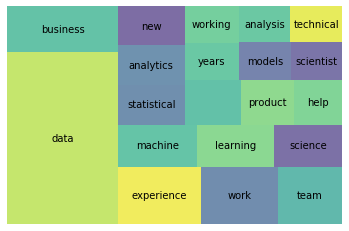

In [0]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = word_count[word_count['rank'] <=20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',max_features=600)

### Create a vocabulary and get word counts per document
### Similiar to fit_predict
dtm = tfidf.fit_transform(df1['clean_desc'])

### Print word counts

### Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

### View Feature Matrix as DataFrame
dtm.head()


,ability,able,access,accommodation,accuracy,achieve,action,actionable,activities,ad,...,workplace,works,world,worlds,writing,written,www,year,years,youll
0,0.112720,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0
1,0.038771,0.0,0.0,0.0,0.075173,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.080043,0.0,0.141,0.049171,0.0,0.067044,0.000000,0.0
2,0.096113,0.0,0.0,0.0,0.000000,0.0,0.00000,0.143772,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.11285,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000,0.000000,0.0,0.116817,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.222419,0.0


In [0]:
# We can use spacy to do the tokenization, and use bigram words
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop is False) and (token.is_punct is False)]

In [0]:
# instanstiate tfidf with spacy tokenizer
tfidf_spacy = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=0.97,
                        min_df=0.3,
                        tokenizer=tokenize)
dtm_tf_spacy = tfidf_spacy.fit_transform(df1['clean_desc'])

# make a df out of the sparse matrix and get features from the original object
dtm_tf_spacy = pd.DataFrame(dtm_tf_spacy.todense(), columns=tfidf_spacy.get_feature_names())

dtm_tf_spacy.head()

,,ability,advanced,algorithm,analysis,analytic,analytical,analyze,apply,base,...,understand,understanding,use,value,veteran,work,world,write,year,year experience
0,0.166047,0.182523,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.211525,0.000000,0.0,0.000000,0.117758,0.00000,0.204766,0.000000,0.0
1,0.000000,0.075618,0.000000,0.083763,0.0,0.0,0.077855,0.000000,0.000000,0.0,...,0.0,0.087633,0.000000,0.0,0.000000,0.195144,0.14782,0.169666,0.056771,0.0
2,0.000000,0.000000,0.168425,0.000000,0.0,0.0,0.157534,0.172203,0.143031,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.197430,0.00000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.174250,0.000000,0.0,...,0.0,0.000000,0.172045,0.0,0.181832,0.199777,0.00000,0.000000,0.116237,0.0
4,0.382164,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.315383,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [0]:
from sklearn.neighbors import NearestNeighbors

### Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

nn.fit(dtm_tf_spacy)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

nn.kneighbors([dtm_tf_spacy.iloc[0].values])


(array([[0.        , 0.96067438, 1.00328511, 1.00724237, 1.01112709]]),
 array([[  0, 345,  56, 336, 419]], dtype=int64))

In [0]:
df1['clean_desc'][0]

'job requirements:conceptual understanding in machine learning models like naive bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn along with hands-on experience in at least  of themintermediate to expert level coding skills in python/r. (ability to write functions, clean and efficient data manipulation are mandatory for this role)exposure to packages like numpy, scipy, pandas, matplotlib etc in python or ggplot, dplyr, tidyr in rability to communicate model findings to both technical and non-technical stake holdershands on experience in sql/hive or similar programming languagemust show past work via github, kaggle or any other published articlemaster\'s degree in statistics/mathematics/computer science or any other quant specific field.apply now"'

In [0]:
df1['clean_desc'][345][:600]

'small businesses are the backbone of the american economy, providing innovation, growth, and job opportunities to the communities around them. many small businesses need funds to run and grow their business, but often dont get the financial help they need from traditional banks. thats where bluevine comes in. bluevine is a leading provider of small business financing. were using cutting edge technology to disrupt the traditional banking industry and develop the next generation of fast and simple financial products, designed for todays small businesses. bluevine is headquartered in redwood city'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 